# CartPole mit DQN

## Aufgabe 3
Löse das CartPole-v0 Environment mittels DQN.

In [1]:
%run ../setup.ipynb

In [2]:
from lib.statistics import plot
import time
import numpy as np
from collections import deque
from contextlib import suppress

def interact_with_environment(env, agent, n_episodes=500, max_steps=200, train=True, verbose=True):      
    statistics = []
    
    with suppress(KeyboardInterrupt):
        for episode in range(n_episodes):
            done = False
            total_reward = 0
            state = env.reset()
            episode_start_time = time.time()

            for t in range(max_steps):
                action = agent.act(state)
                next_state, reward, done, _ = env.step(action)

                if train:
                    agent.train((state, action, next_state, reward, done))

                state = next_state
                total_reward += reward

                if done:
                    break

            if verbose and episode % 10 == 0:
                speed = t / (time.time() - episode_start_time)
                print(f'episode: {episode}/{n_episodes}, score: {total_reward}, steps: {t}, '
                      f'e: {agent.epsilon:.3f}, speed: {speed:.2f} steps/s')

            statistics.append({
                'episode': episode,
                'score': total_reward,
                'steps': t
            })
        
    return statistics

### 3.1
Implementiere in **agent.py** einen Agenten, der in der Lage ist das CartPole Environment zu lösen.

In [3]:
import gym
env = gym.make('CartPole-v0')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
episode: 0/500, score: 18.0, steps: 17, e: 1.000, speed: 50858.18 steps/s
episode: 10/500, score: 9.0, steps: 8, e: 1.000, speed: 45590.26 steps/s
episode: 20/500, score: 18.0, steps: 17, e: 1.000, speed: 48080.36 steps/s
episode: 30/500, score: 29.0, steps: 28, e: 1.000, speed: 47856.77 steps/s
episode: 40/500, score: 23.0, steps: 22, e: 1.000, speed: 48719.48 steps/s
episode: 50/500, score: 9.0, steps: 8, e: 1.000, speed: 44679.67 steps/s
episode: 60/500, score: 11.0, steps: 10, e: 1.000, speed: 44620.26 steps/s
episode: 70/500, score: 38.0, steps: 37, e: 1.000, speed: 47458.49 steps/s
episode: 80/500, score: 47.0, steps: 46, e: 1.000, speed: 48562.29 steps/s
episode: 90/500, score: 14.0, steps: 13, e: 1.000, speed: 46091.25 steps/s
Instructions for updating:
Use tf.cast instead.
episode: 100/500, score: 12.0, steps: 11, e: 0.927, speed: 61.48 steps/s
episode: 110/5

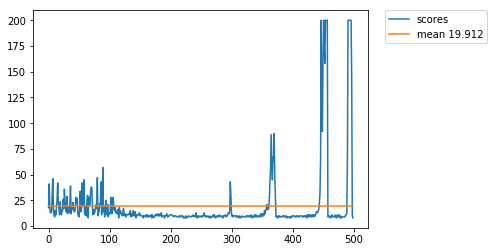

In [4]:
from agent import DQN

action_size = env.action_space.n
action_space = env.action_space
state_size = env.observation_space.shape[0]

# Hyperparams
annealing_steps = 1000  # not episodes!
gamma = 0.95
epsilon = 1.0 #1
epsilon_min = 0.01
epsilon_decay = (epsilon - epsilon_min) / annealing_steps
alpha = 0.001
batch_size = 64
memory_size = 10000
start_replay_step = 2000
target_model_update_interval = 1000

agent = DQN(action_size=action_size, action_space=action_space, state_size=state_size, gamma=gamma, 
            epsilon=epsilon, epsilon_decay=epsilon_decay, epsilon_min=epsilon_min, 
            alpha=alpha, batch_size=batch_size, memory_size=memory_size,
            start_replay_step=start_replay_step, 
            target_model_update_interval=target_model_update_interval)
statistics = interact_with_environment(env, agent, verbose=True)
env.close()
plot(statistics)


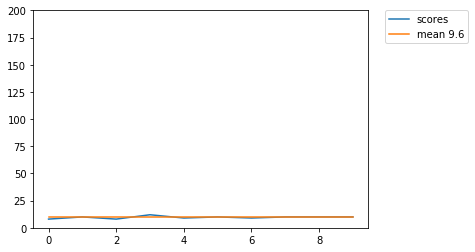

In [5]:
from gym.wrappers import Monitor
from lib.statistics import html_video_embedding

# capture every episode and clean 'video' folder before each run
env = gym.make('CartPole-v0')
env = Monitor(env, './video', video_callable=lambda episode_id: True, force=True, uid='id')
statistics = interact_with_environment(env, agent, n_episodes=10, train=False, verbose=False)
env.close()
plot(statistics, y_limits=(0,200))
html_video_embedding(statistics)